In [1]:
# National analysis of police killings: Sheriff vs Police trends over time
# 
# This notebook provides a national-level view of how the share of lethal force incidents
# has changed between sheriff's offices and police departments over the past decade.
# 
# Key analyses:
# - Tracks the percentage of total incidents involving sheriffs vs police over time
# - Shows staffing trends for both agency types
# - Creates visualizations showing the changing composition of lethal force incidents
# - Provides context for the main finding that sheriff incident rates are increasing
# 
# This complements the arrest-rate analysis by showing raw incident share trends

In [2]:
# Import required libraries
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Set up plotting style and pandas display options for better output
plt.style.use('seaborn-v0_8-white')
pd.set_option('display.max_columns', 100)

In [4]:
# Load the Mapping Police Violence data directly for some basic analysis
# We use this to understand the overall scope and timeline of the dataset
# before diving into the flagged data from our cleaning process

incidents = (
    pd.read_csv(
        "../data/Mapping Police Violence.csv",
        parse_dates = ["date"],  # Updated to new column name
    )
    .rename_axis("incident_uid")
    .reset_index()
)

print(f"Total incidents in dataset: {len(incidents)}")
print(f"Date range: {incidents['date'].min()} to {incidents['date'].max()}")
print(f"States covered: {incidents['state'].nunique()}")

incidents.head(3)

Total incidents in dataset: 14676
Date range: 2012-05-22 00:00:00 to 2025-06-30 00:00:00
States covered: 51


,incident_uid,name,age,gender,race,victim_image,date,street_address,city,state,zip,county,agency_responsible,ori,cause_of_death,circumstances,disposition_official,officer_charged,news_urls,signs_of_mental_illness,allegedly_armed,wapo_armed,wapo_threat_level,wapo_flee,wapo_body_camera,wapo_id,off_duty_killing,geography,fe_id,encounter_type,initial_reason,officer_names,officer_races,officer_known_past_shootings,call_for_service,tract,urban_rural_uspsai,urban_rural_nchs,hhincome_median_census_tract,latitude,longitude,pop_total_census_tract,pop_white_census_tract,pop_black_census_tract,pop_native_american_census_tract,pop_asian_census_tract,pop_pacific_islander_census_tract,pop_other_multiple_census_tract,pop_hispanic_census_tract,congressional_district_113,congressperson_lastname,congressperson_firstname,congressperson_party,prosecutor_head,prosecutor_race,prosecutor_gender,prosecutor_party,prosecutor_term,prosecutor_in_court,prosecutor_special,independent_investigation,prosecutor_url
0,0,David Bahrami,26.0,Male,White,https://antiochherald.com/wp-content/uploads/2...,2025-06-30,3841 Osprey Dr,Antioch,California,NaN,NaN,Antioch Police Department,CA0070100,Gunshot,The victim called 911 and reported he was goin...,Pending Investigation,NaN,https://abc7news.com/post/antioch-police-fatal...,No,Allegedly Armed,Knife,Sudden Threatening Movement,Not Fleeing,Yes,NaN,NaN,NaN,NaN,Person with a Weapon,threatening individuals (armed),"Merrill, Lorono,",NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Daphine Mae Jennings,58.0,Female,White,NaN,2025-06-30,200 block of Mountain Laurel Drive,La Grange,Georgia,NaN,NaN,Troup County Sheriff's Office,GA1410000,Gunshot,Officers responded to a call from a woman who ...,Pending Investigation,NaN,https://www.fox5atlanta.com/news/woman-shot-tr...,Yes,Allegedly Armed,Gun,Brandished Weapon,Not Fleeing,NaN,NaN,NaN,NaN,NaN,Mental Health/Welfare Check,suicidal and threatening violence (armed),NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Joshua B. Coffey,48.0,Male,White,NaN,2025-06-30,1400 block of South Third Street,Niles,Michigan,NaN,NaN,Berrien County Sheriff's Office,MI1111100,Gunshot,Police report that an officer approached a par...,Pending Investigation,NaN,https://wsbt.com/news/local/police-investigati...,No,Allegedly Armed,Gun,Attack,Foot,Yes,NaN,NaN,NaN,NaN,Person with a Weapon,Suspicious Vehicle,Cal Landon,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Law Enforcement Staffing Trends Analysis

# This section analyzes how staffing levels have changed over time for different
# types of law enforcement agencies, providing context for incident trends

In [5]:
# Load the agency staffing data created in the cleaning notebooks
# This data shows how many agencies, officers, and total staff exist for each agency type by year

leoka = pd.read_csv("../outputs/agency_staff_all_years.csv")

print(f"Staffing data covers {len(leoka)} agency-year-state records")
print(f"Years: {leoka['year'].min()} to {leoka['year'].max()}")
print(f"Agency types: {leoka['agency_type'].unique()}")

leoka.head(3)

Staffing data covers 12040 agency-year-state records
Years: 1960 to 2022
Agency types: ['local police department' 'state law enforcement agency'
 'sheriffs office' 'special jurisdiction' 'constable/marshal' 'federal']


,year,state_abb,agency_type,agencies,officers,total_staff
0,1960,AK,local police department,6,110.0,138.0
1,1960,AK,state law enforcement agency,1,0.0,0.0
2,1960,AL,local police department,106,1815.0,2023.0


In [6]:
# Calculate total number of agencies by type over time
# This shows how the law enforcement landscape has evolved - are there more sheriff's offices
# or police departments being created/eliminated over time?

leoka_agencies = (
    leoka
    .groupby(
        ["year", "agency_type"]
    )
    .sum()  # Sum agencies across all states
    .reset_index()
    .pivot(
        index = "year",
        columns = "agency_type",
        values = "agencies"
    )
    .reset_index()
    .rename_axis(None, axis=1)  # Clean up column names
)

print("National agency counts by type over time:")
print("This shows how the total number of each agency type has changed")

leoka_agencies.head(3)

National agency counts by type over time:
This shows how the total number of each agency type has changed


,year,constable/marshal,federal,local police department,sheriffs office,special jurisdiction,state law enforcement agency
0,1960,4.0,NaN,5334.0,3022.0,13.0,15.0
1,1961,4.0,NaN,5343.0,3045.0,13.0,15.0
2,1962,4.0,NaN,5549.0,3046.0,14.0,16.0


In [7]:
# Calculate national staffing levels and percentages by agency type over time
# This analysis is important because it shows:
# - Whether sheriff's offices are growing relative to police departments
# - How the composition of law enforcement has changed over time
# - Context for interpreting incident trends (more sheriff staff = more opportunities for incidents?)

leoka_staff = (
    leoka
    .pivot(
        index = ["year", "state_abb"],
        columns = "agency_type",
        values = "total_staff"
    )
    .reset_index()
    .rename_axis(None, axis=1)  # Clean up column names
    .fillna(0)  # Fill missing values with 0
    .drop(columns = ["state_abb"])  # Drop state to aggregate nationally
    .groupby("year")
    .sum()  # Sum staff across all states for each year
    .reset_index()
    .assign(
        # Combine smaller agency types into "other" category
        other_staff = lambda x: x["constable/marshal"] + x["state law enforcement agency"] + x["federal"] + x["special jurisdiction"],
        # Calculate total law enforcement staff
        total_staff = lambda x: x["local police department"] + x["sheriffs office"] + x["other_staff"]
    )
    .assign(
        # Calculate percentages to show relative size of each agency type
        percent_sheriff = lambda x: x["sheriffs office"] / x["total_staff"] * 100,
        percent_police = lambda x: x["local police department"] / x["total_staff"] * 100
    )
)

print("National law enforcement staffing trends:")
print("This shows how the composition of law enforcement staff has changed over time")

leoka_staff.head()

National law enforcement staffing trends:
This shows how the composition of law enforcement staff has changed over time


,year,constable/marshal,federal,local police department,sheriffs office,special jurisdiction,state law enforcement agency,other_staff,total_staff,percent_sheriff,percent_police
0,1960,27.0,0.0,195461.0,122.0,6.0,1310.0,1343.0,196926.0,0.061952,99.256066
1,1961,46.0,0.0,180363.0,16658.0,151.0,4809.0,5006.0,202027.0,8.245433,89.276681
2,1962,34.0,0.0,202701.0,19213.0,6.0,1684.0,1724.0,223638.0,8.591116,90.637995
3,1963,30.0,31.0,196708.0,17409.0,232.0,0.0,293.0,214410.0,8.119491,91.743855
4,1964,31.0,0.0,197674.0,17754.0,16.0,105.0,152.0,215580.0,8.235458,91.694035


In [8]:
# Compare staffing changes from 2013 to 2022 to understand workforce trends
# This provides important context: are sheriff incident rates increasing because
# there are more sheriff employees, or are rates increasing independent of staffing?

start_sheriff_staff = leoka_staff.query("year == 2013")["sheriffs office"].values[0]
end_sheriff_staff = leoka_staff.query("year == 2022")["sheriffs office"].values[0]
start_police_staff = leoka_staff.query("year == 2013")["local police department"].values[0]
end_police_staff = leoka_staff.query("year == 2022")["local police department"].values[0]

sheriff_staff_growth = (end_sheriff_staff - start_sheriff_staff) / start_sheriff_staff * 100
police_staff_growth = (end_police_staff - start_police_staff) / start_police_staff * 100

print(f"""
STAFFING TRENDS (2013-2022):

Sheriff's Office Staff:
• 2013: {start_sheriff_staff:,.0f}
• 2022: {end_sheriff_staff:,.0f}
• Change: {sheriff_staff_growth:+.1f}%

Police Department Staff:
• 2013: {start_police_staff:,.0f}
• 2022: {end_police_staff:,.0f}
• Change: {police_staff_growth:+.1f}%

Key insight: Sheriff staffing has grown modestly while police staffing has declined.
This means the increasing sheriff incident rates are NOT simply due to more sheriff employees.
""")


STAFFING TRENDS (2013-2022):

Sheriff's Office Staff:
• 2013: 308,110
• 2022: 310,839
• Change: +0.9%

Police Department Staff:
• 2013: 575,227
• 2022: 547,475
• Change: -4.8%

Key insight: Sheriff staffing has grown modestly while police staffing has declined.
This means the increasing sheriff incident rates are NOT simply due to more sheriff employees.



In [9]:
# Load the flagged incidents data created in the cleaning notebooks
# This contains all MPV incidents with flags indicating whether they involved sheriffs, police, or others

incidents_flagged = (
    pd.read_csv(
        "../outputs/incidents_flagged.csv",
        parse_dates = ["date"],  # Updated to new column name
    )
)

print(f"Loaded {len(incidents_flagged)} flagged incidents")
print(f"Sheriff incidents: {incidents_flagged['sheriff'].sum()}")
print(f"Police incidents: {incidents_flagged['police'].sum()}")
print(f"Other incidents: {incidents_flagged['others'].sum()}")

Loaded 14676 flagged incidents
Sheriff incidents: 4384
Police incidents: 10170
Other incidents: 768


## Analysis: Is the share of sheriff incidents increasing over time?

# This section analyzes whether sheriff's offices are responsible for a growing
# percentage of lethal force incidents over time, independent of arrest rates

In [10]:
# Create a simplified dataset for analyzing incident trends by year
# Focus on the key variables: year and agency type flags

incidents_short = (
    incidents_flagged
    .assign(
        year = lambda f: f["date"].dt.year,  # Updated to new column name
    )
    [["incident_uid", "state", "year", "sheriff", "police", "others"]]  # Updated column names to match CSV
)

print(f"Created simplified dataset with {len(incidents_short)} incidents")
print(f"Years covered: {incidents_short['year'].min()} to {incidents_short['year'].max()}")

incidents_short.head()

Created simplified dataset with 14676 incidents
Years covered: 2012 to 2025


,incident_uid,state,year,sheriff,police,others
0,0,California,2025,False,True,False
1,1,Georgia,2025,True,False,False
2,2,Michigan,2025,True,False,False
3,3,Florida,2025,True,False,False
4,4,North Carolina,2025,False,True,False


In [11]:
# Quick check: Show annual incident counts by agency type
# This gives us the raw numbers that drive the percentage calculations

annual_counts = incidents_short.groupby("year")[["sheriff", "police", "others"]].sum()
print("Annual incident counts by agency type:")
print("Note: Some incidents involve multiple agency types, so totals may exceed 100%")

annual_counts

Annual incident counts by agency type:
Note: Some incidents involve multiple agency types, so totals may exceed 100%


,sheriff,police,others
year,,,
2012,0,1,0
2013,283,769,50
2014,293,734,50
2015,295,785,60
2016,304,730,58
2017,330,766,45
2018,327,802,64
2019,325,759,70
2020,367,772,72


In [12]:
# Example of multi-agency incident: Some incidents involve both sheriffs and police
# This shows why our flagging approach uses OR logic - an incident can involve multiple agency types

sample_multi_agency = incidents.query("incident_uid == 2")["agency_responsible"].values
print("Example of incident involving multiple agencies:")
print(f"Incident #2 agency: {sample_multi_agency[0] if len(sample_multi_agency) > 0 else 'Not found'}")
print("\nThis is why some incidents are flagged as both 'sheriff' AND 'police' - because multiple agencies were involved.")

Example of incident involving multiple agencies:
Incident #2 agency: Berrien County Sheriff's Office

This is why some incidents are flagged as both 'sheriff' AND 'police' - because multiple agencies were involved.


In [13]:
# Calculate the share of incidents by agency type over time
# This is a different perspective from the arrest-rate analysis - it shows raw percentages
# of total incidents rather than rates per arrest

sheriff_incidents = (
    incidents_short
    .loc[ lambda x: x["year"] < 2024 ]  # Exclude incomplete 2024 data
    .groupby(["year"])
    .agg(
        incidents = ("incident_uid", "count"),          # Total incidents per year
        sheriff_involved = ("sheriff", "sum"),          # Sheriff incidents per year
        police_involved = ("police", "sum"),            # Police incidents per year  
        others_involved = ("others", "sum"),            # Other agency incidents per year
    )
    .assign(
        # Calculate percentages of total incidents
        sheriff_involved_pct = lambda f: round(f["sheriff_involved"] / f["incidents"] * 100, 1),
        police_involved_pct = lambda f: round(f["police_involved"] / f["incidents"] * 100, 1),
        others_involved_pct = lambda f: round(f["others_involved"] / f["incidents"] * 100, 1),
    )
    .reset_index()
    .sort_values("year", ascending=True)
)

print("Incident share trends over time:")
print("This shows what percentage of all lethal force incidents involved each agency type")

sheriff_incidents

Incident share trends over time:
This shows what percentage of all lethal force incidents involved each agency type


,year,incidents,sheriff_involved,police_involved,others_involved,sheriff_involved_pct,police_involved_pct,others_involved_pct
0,2012,1,0,1,0,0.0,100.0,0.0
1,2013,1075,283,769,50,26.3,71.5,4.7
2,2014,1038,293,734,50,28.2,70.7,4.8
3,2015,1104,295,785,60,26.7,71.1,5.4
4,2016,1068,304,730,58,28.5,68.4,5.4
5,2017,1105,330,766,45,29.9,69.3,4.1
6,2018,1152,327,802,64,28.4,69.6,5.6
7,2019,1116,325,759,70,29.1,68.0,6.3
8,2020,1160,367,772,72,31.6,66.6,6.2
9,2021,1190,359,837,63,30.2,70.3,5.3


In [14]:
# Summarize the key trend: Growing share of sheriff incidents
# Calculate the key statistics that show how incident composition has changed

start_year = incidents_short["year"].min()
end_year = 2023  # Use 2023 as end year for complete data

# Get percentage values for start and end years
start_sheriff_pct = sheriff_incidents.loc[sheriff_incidents["year"] == start_year, "sheriff_involved_pct"].values[0]
end_sheriff_pct = sheriff_incidents.loc[sheriff_incidents["year"] == end_year, "sheriff_involved_pct"].values[0]
start_police_pct = sheriff_incidents.loc[sheriff_incidents["year"] == start_year, "police_involved_pct"].values[0]
end_police_pct = sheriff_incidents.loc[sheriff_incidents["year"] == end_year, "police_involved_pct"].values[0]

# Calculate summary statistics
total_killings = sheriff_incidents["incidents"].sum()
total_sheriff_killings = sheriff_incidents["sheriff_involved"].sum()
total_police_killings = sheriff_incidents["police_involved"].sum()

print(f"""
INCIDENT SHARE TRENDS ({start_year}-{end_year}):

Sheriff's Office Share:
• {start_year}: {start_sheriff_pct}% of all incidents
• {end_year}: {end_sheriff_pct}% of all incidents  
• Change: {end_sheriff_pct - start_sheriff_pct:+.1f} percentage points

Police Department Share:
• {start_year}: {start_police_pct}% of all incidents
• {end_year}: {end_police_pct}% of all incidents
• Change: {end_police_pct - start_police_pct:+.1f} percentage points

Overall ({start_year}-{end_year}):
• Total incidents: {total_killings:,}
• Sheriff incidents: {total_sheriff_killings:,} ({total_sheriff_killings/total_killings*100:.1f}% of total)
• Police incidents: {total_police_killings:,} ({total_police_killings/total_killings*100:.1f}% of total)

Key finding: Sheriff's offices are responsible for a growing share of lethal force incidents.
""")


INCIDENT SHARE TRENDS (2012-2023):

Sheriff's Office Share:
• 2012: 0.0% of all incidents
• 2023: 32.2% of all incidents  
• Change: +32.2 percentage points

Police Department Share:
• 2012: 100.0% of all incidents
• 2023: 71.9% of all incidents
• Change: -28.1 percentage points

Overall (2012-2023):
• Total incidents: 12,636
• Sheriff incidents: 3,745 (29.6% of total)
• Police incidents: 8,762 (69.3% of total)

Key finding: Sheriff's offices are responsible for a growing share of lethal force incidents.



## Visualization: National trends in lethal force incidents by agency type

# Create the main chart showing how the composition of lethal force incidents has changed over time

In [15]:
# Duplicate the incident share calculation for visualization
# (This appears to be duplicated in the original notebook for clarity in the viz section)

sheriff_incidents = (
    incidents_short
    .loc[ lambda x: x["year"] < 2024 ]  # Exclude incomplete 2024 data
    .groupby(["year"])
    .agg(
        incidents = ("incident_uid", "count"),
        sheriff_involved = ("sheriff", "sum"),
        police_involved = ("police", "sum"),
        others_involved = ("others", "sum"),
    )
    .assign(
        sheriff_involved_pct = lambda f: round(f["sheriff_involved"] / f["incidents"] * 100, 1),
        police_involved_pct = lambda f: round(f["police_involved"] / f["incidents"] * 100, 1),
        others_involved_pct = lambda f: round(f["others_involved"] / f["incidents"] * 100, 1),
    )
    .reset_index()
    .sort_values("year", ascending=True)
)

sheriff_incidents.head()

,year,incidents,sheriff_involved,police_involved,others_involved,sheriff_involved_pct,police_involved_pct,others_involved_pct
0,2012,1,0,1,0,0.0,100.0,0.0
1,2013,1075,283,769,50,26.3,71.5,4.7
2,2014,1038,293,734,50,28.2,70.7,4.8
3,2015,1104,295,785,60,26.7,71.1,5.4
4,2016,1068,304,730,58,28.5,68.4,5.4


In [16]:
# Prepare data for stacked bar visualization (not used in final viz, but useful for analysis)
# This normalizes the data to show each agency type as a percentage of total incidents

sheriff_normalized = (
    sheriff_incidents
    .set_index("year")
    [["police_involved", "sheriff_involved", "others_involved"]]
    .pipe(
        # Convert raw counts to percentages of total for each year
        lambda f: f.div(f.sum(axis=1), axis=0) * 100
    )
    .sort_index()
)

print("Normalized incident shares (each year sums to 100%):")
sheriff_normalized.tail()

Normalized incident shares (each year sums to 100%):


,police_involved,sheriff_involved,others_involved
year,,,
2019,65.771231,28.162912,6.065858
2020,63.748968,30.305533,5.945500
2021,66.481334,28.514694,5.003971
2022,62.452972,31.978932,5.568096
2023,66.192412,29.607046,4.200542


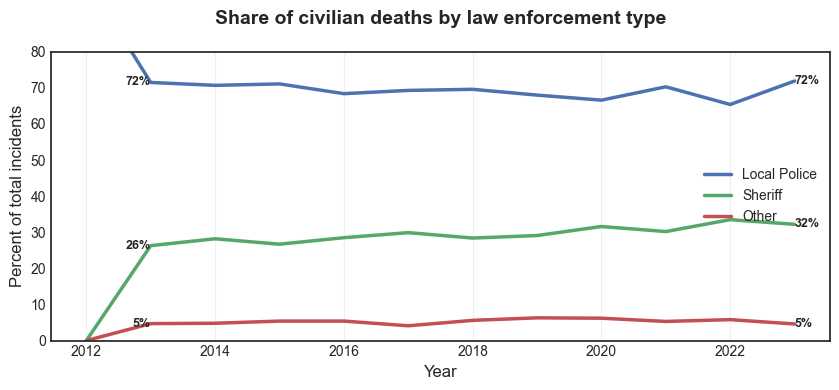


Key insights from this visualization:
1. Sheriff's offices are responsible for a growing share of lethal force incidents
2. Police departments' share has declined slightly over the same period
3. The trend suggests systematic differences in how these agency types operate
4. This complements the arrest-rate finding: sheriffs have both higher rates AND growing share


In [17]:
# Create the main visualization showing incident share trends over time
# This chart complements the arrest-rate analysis by showing raw percentage trends
# Key message: Sheriff's offices are responsible for a growing share of lethal force incidents

# Prepare data for line chart
sheriff_share_incidents = (
    sheriff_incidents
    .set_index("year")
    [["police_involved_pct", "sheriff_involved_pct", "others_involved_pct"]]
)

# Create the line chart
ax = (
    sheriff_share_incidents
    .plot(
        kind = "line",
        figsize = (8.5, 4),
        ylim = (0, 80),  # Adjust y-axis to focus on main trends
        color = ["#4C72B0", "#55A868", "#C44E52"],  # Blue, green, red
        linewidth = 2.5
    )
)

# Add data labels at start and end of each line for clarity
for col in sheriff_share_incidents.columns:
    # Beginning label (2013)
    start_value = sheriff_share_incidents[col].loc[2013]
    ax.text(2013, start_value, f'{start_value:.0f}%', va='center', ha='right', fontsize=9, fontweight='bold')

    # End label (2023)
    end_value = sheriff_share_incidents[col].loc[2023]
    ax.text(2023, end_value, f'{end_value:.0f}%', va='center', ha='left', fontsize=9, fontweight='bold')

# Customize the chart
ax.legend(["Local Police", "Sheriff", "Other"], loc='center right')
ax.grid(axis='x', alpha=0.3)
ax.set_title("Share of civilian deaths by law enforcement type", fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel("Percent of total incidents", fontsize=12)
ax.set_xlabel("Year", fontsize=12)

# Save the chart
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("../outputs/national_sheriff_vs_police.png", dpi=300, bbox_inches='tight')
plt.show()

print("\nKey insights from this visualization:")
print("1. Sheriff's offices are responsible for a growing share of lethal force incidents")
print("2. Police departments' share has declined slightly over the same period")
print("3. The trend suggests systematic differences in how these agency types operate")
print("4. This complements the arrest-rate finding: sheriffs have both higher rates AND growing share")

---
---
---